# FDA_HW2
E94041220 郭濯瑀

問題: 預測排球系隊是否會拿系際盃冠軍

* 系隊人數
* 一周練球次數
* 是否有校隊球員
* 之前拿過幾次冠軍
* 參加過幾次比賽
* 是否額外聘請教練

In [45]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz
import pydotplus
import random
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

預測決策樹
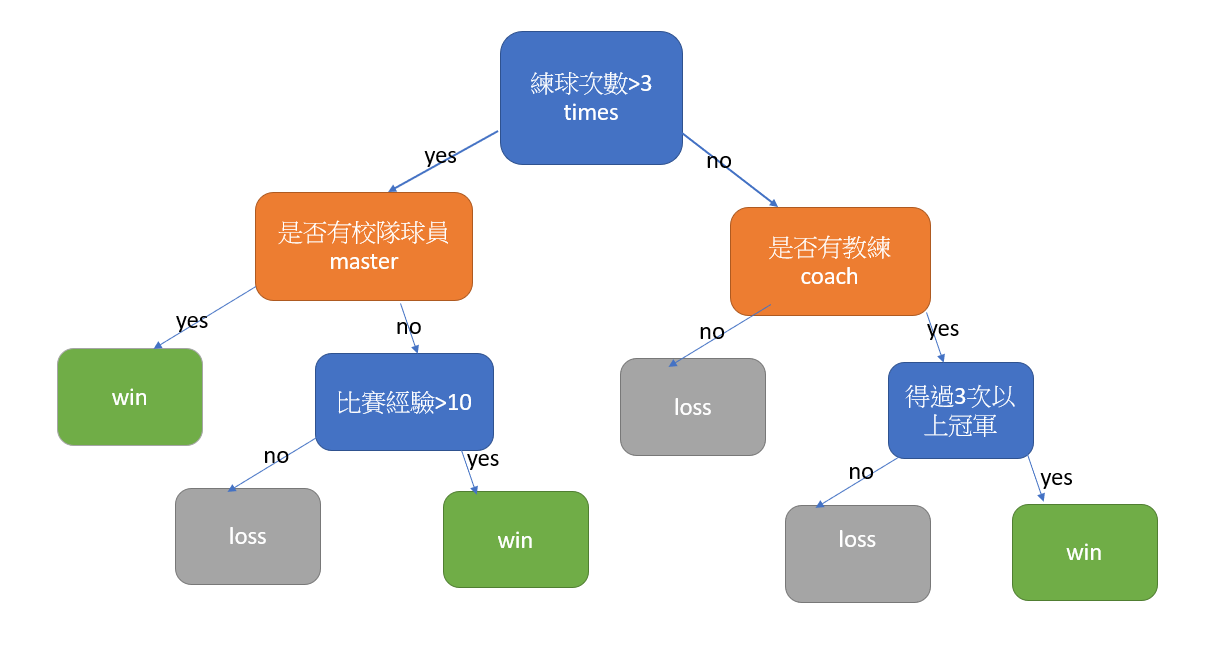

In [46]:
def make_dtframe(num):
    pd_data = pd.DataFrame(columns=['number_student', 'times', 'master', 'champion', 'experience', 'coach', 'win'])
    for i in range(1000):
        pd_data.loc[i, 'number_student'] = random.randint(6, 20)
        pd_data.loc[i, 'times'] = random.randint(0, 7)
        pd_data.loc[i, 'master'] = random.randint(0, 1)
        pd_data.loc[i, 'champion'] = random.randint(0, 5)
        pd_data.loc[i, 'experience'] = random.randint(0, 20)
        pd_data.loc[i, 'coach'] = random.randint(0, 1)
        
        
        if pd_data.loc[i, 'times'] > 3:
            if pd_data.loc[i, 'master'] ==1 :
                pd_data.loc[i, 'win'] = 1
            
            else:
                if pd_data.loc[i, 'experience'] > 10:
                    pd_data.loc[i, 'win'] = 1
                
                else:
                    pd_data.loc[i, 'win'] = 0
    
        else:
            if pd_data.loc[i, 'coach'] == 1:
                if pd_data.loc[i, 'champion'] > 2:
                    pd_data.loc[i, 'win'] = 1
                
                else:
                    pd_data.loc[i, 'win'] = 0
                
            else: 
                pd_data.loc[i, 'win'] = 0
    
    return pd_data

In [47]:
train_data = make_dtframe(9000)
test_data = make_dtframe(2000)

train_data.head()

,number_student,times,master,champion,experience,coach,win
0,15.0,1.0,1.0,5.0,9.0,0.0,0.0
1,7.0,3.0,0.0,1.0,17.0,0.0,0.0
2,14.0,2.0,1.0,1.0,19.0,0.0,0.0
3,13.0,0.0,1.0,1.0,17.0,1.0,0.0
4,14.0,7.0,1.0,3.0,16.0,1.0,1.0


In [48]:
train_x = train_data.drop(['win'], axis=1)
train_y = train_data['win'].values
test_x = test_data.drop(['win'], axis=1)
test_y = test_data['win'].values

In [49]:
dtree = DecisionTreeClassifier(max_depth=4)
dtree.fit(train_x, train_y)

dot_data = StringIO()

export_graphviz(dtree,
    out_file=dot_data,
    filled=True,
    feature_names=list(train_x),
    class_names=['loss', 'win'],
    special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf('tree1.pdf')

True

實際上的tree
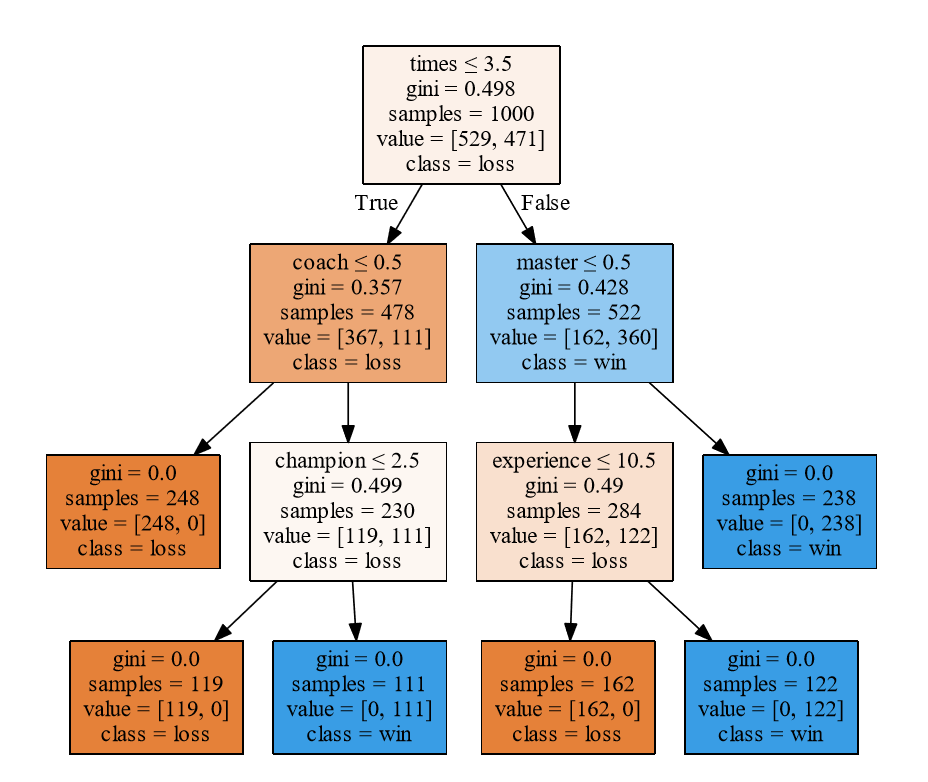

## 討論:建立出的decision tree與原本所設計的規則是差不多的

In [50]:
from sklearn.metrics import accuracy_score
dt_predict = dtree.predict(test_x)
accuracy_score(dt_predict, test_y)

1.0

In [51]:
def make_dtframe2(num):
    pd_data = pd.DataFrame(columns=['number_student','money', 'times', 'master', 'champion', 'experience', 'coach', 'win'])
    for i in range(1000):
        pd_data.loc[i, 'number_student'] = random.randint(6, 20)
        pd_data.loc[i, 'times'] = random.randint(0, 7)
        pd_data.loc[i, 'master'] = random.randint(0, 1)
        pd_data.loc[i, 'champion'] = random.randint(0, 5)
        pd_data.loc[i, 'experience'] = random.randint(0, 20)
        pd_data.loc[i, 'coach'] = random.randint(0, 1)
        pd_data.loc[i, 'money'] = random.randint(0, 10)
        
        
        if pd_data.loc[i, 'times'] > 3:
            if pd_data.loc[i, 'master'] ==1 :
                pd_data.loc[i, 'win'] = 1
            
            else:
                if pd_data.loc[i, 'experience'] > 10:
                    pd_data.loc[i, 'win'] = 1
                
                else:
                    pd_data.loc[i, 'win'] = 0
    
        else:
            if pd_data.loc[i, 'coach'] == 1:
                if pd_data.loc[i, 'champion'] > 2:
                    if pd_data.loc[i, 'money'] > 5:
                        pd_data.loc[i, 'win'] = 1
                    else:
                        pd_data.loc[i, 'win'] = 0
                
                else:
                    pd_data.loc[i, 'win'] = 0
                
            else: 
                if pd_data.loc[i, 'number_student'] > 12:
                    pd_data.loc[i, 'win'] = 1
                else:
                    pd_data.loc[i, 'win'] = 0
    
    return pd_data

In [52]:
train_data2 = make_dtframe2(9000)
test_data2 = make_dtframe2(2000)

train_data2.head()

,number_student,money,times,master,champion,experience,coach,win
0,16.0,1.0,6.0,1.0,2.0,14.0,0.0,1.0
1,13.0,10.0,3.0,0.0,3.0,17.0,0.0,1.0
2,16.0,6.0,3.0,0.0,4.0,15.0,1.0,1.0
3,7.0,3.0,7.0,0.0,2.0,17.0,1.0,1.0
4,20.0,5.0,3.0,1.0,0.0,15.0,1.0,0.0


In [53]:
train_x2 = train_data2.drop(['win'], axis=1)
train_y2 = train_data2['win'].values
test_x2 = test_data2.drop(['win'], axis=1)
test_y2 = test_data2['win'].values

In [54]:
dtree2 = DecisionTreeClassifier(max_depth=4)
dtree2.fit(train_x2, train_y2)

dot_data = StringIO()

export_graphviz(dtree2,
    out_file=dot_data,
    filled=True,
    feature_names=list(train_x2),
    class_names=['loss', 'win'],
    special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf('tree2.pdf')

True